In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [2]:
data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252',low_memory=False)

In [3]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [4]:
#remove rows where id category title nad price are null 
data = data.dropna(subset=['id', 'category', 'title', 'price','price_type','fee','bedrooms','bathrooms','time','source','square_feet','state','latitude','longitude','amenities'])
#drop address and pets allowed columns
data = data.drop(columns=['address','pets_allowed','price_type'])
#remove rows where price is 0
data = data[data.price != 0]
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 83166 entries, 21 to 99491
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             83166 non-null  int64  
 1   category       83166 non-null  object 
 2   title          83166 non-null  object 
 3   body           83166 non-null  object 
 4   amenities      83166 non-null  object 
 5   bathrooms      83166 non-null  float64
 6   bedrooms       83166 non-null  float64
 7   currency       83166 non-null  object 
 8   fee            83166 non-null  object 
 9   has_photo      83166 non-null  object 
 10  price          83166 non-null  float64
 11  price_display  83166 non-null  object 
 12  square_feet    83166 non-null  int64  
 13  cityname       83166 non-null  object 
 14  state          83166 non-null  object 
 15  latitude       83166 non-null  float64
 16  longitude      83166 non-null  float64
 17  source         83166 non-null  object 
 18  time      

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,8.316600e+04,83166.000000,83166.000000,83166.000000,83166.000000,83166.000000,83166.000000,8.316600e+04
mean,5.344127e+09,1.443078,1.716098,1517.500300,949.264519,36.882695,-91.285278,1.558824e+09
std,1.807414e+08,0.534653,0.721627,902.832149,338.299885,4.584125,15.720284,1.087552e+07
min,5.121046e+09,1.000000,0.000000,100.000000,130.000000,19.573800,-159.369800,1.544174e+09
25%,5.197908e+09,1.000000,1.000000,1010.000000,735.000000,33.731100,-104.768800,1.550829e+09
50%,5.198614e+09,1.000000,2.000000,1349.000000,900.000000,37.178300,-84.487600,1.550864e+09
75%,5.508970e+09,2.000000,2.000000,1780.000000,1110.000000,39.907100,-77.494800,1.568765e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,12000.000000,64.833200,-68.778800,1.577391e+09


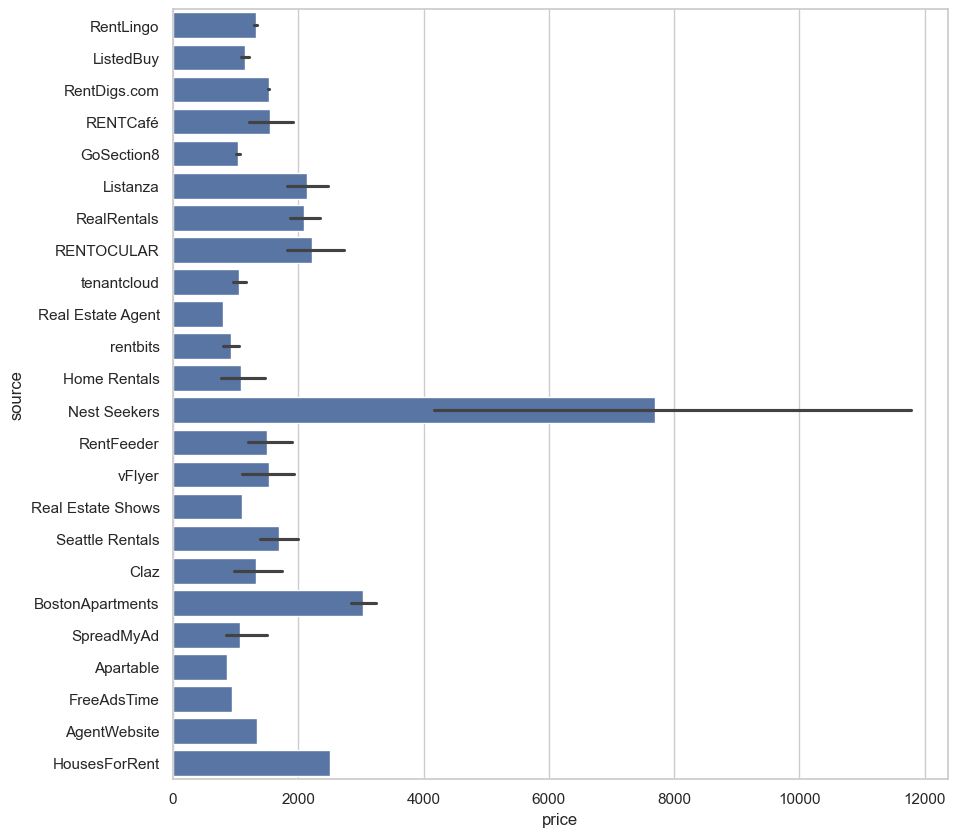

In [5]:
#show importance plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x=data['price'], y=data['source'])
plt.show()


In [6]:
#show the dataset with all columns and rows with non numeric values
data.select_dtypes(exclude=['int', 'float']).head()




,category,title,body,amenities,currency,fee,has_photo,price_display,cityname,state,source
21,housing/rent/apartment,One BR 7011 W PARMER LN,"This unit is located at 7011 W PARMER LN, Aust...","Fireplace,Gym,Parking,Pool,Storage,Wood Floors",USD,No,Thumbnail,"$1,060",Austin,TX,RentLingo
22,housing/rent/apartment,One BR 2800 SUNRISE RD,"This unit is located at 2800 SUNRISE RD, Round...","Gated,Pool",USD,No,Thumbnail,"$1,003",Round Rock,TX,RentLingo
23,housing/rent/apartment,One BR 12330 METRIC BLVD.,"This unit is located at 12330 METRIC BLVD., Au...","Dishwasher,Parking,Pool",USD,No,Thumbnail,$837,Austin,TX,RentLingo
24,housing/rent/apartment,One BR 8021 FM 620 NORTH,"This unit is located at 8021 FM 620 NORTH, Aus...","Dishwasher,Parking,Pool",USD,No,Thumbnail,"$1,020",Austin,TX,RentLingo
25,housing/rent/apartment,One BR 11500 JOLLYVILLE RD.,"This unit is located at 11500 JOLLYVILLE RD., ...","Gym,Pool",USD,No,Thumbnail,$985,Austin,TX,RentLingo


In [7]:
amenities = data['amenities'].str.get_dummies(sep=',')
data = pd.concat([data, amenities], axis=1)
data = data.drop(columns=['amenities'])
data


,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,price,...,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors
21,5668632369,housing/rent/apartment,One BR 7011 W PARMER LN,"This unit is located at 7011 W PARMER LN, Aust...",1.0,1.0,USD,No,Thumbnail,1060.0,...,0,0,1,0,1,0,0,0,0,1
22,5668632002,housing/rent/apartment,One BR 2800 SUNRISE RD,"This unit is located at 2800 SUNRISE RD, Round...",1.0,1.0,USD,No,Thumbnail,1003.0,...,0,0,1,0,0,0,0,0,0,0
23,5668631854,housing/rent/apartment,One BR 12330 METRIC BLVD.,"This unit is located at 12330 METRIC BLVD., Au...",1.0,1.0,USD,No,Thumbnail,837.0,...,0,0,1,0,0,0,0,0,0,0
24,5668631790,housing/rent/apartment,One BR 8021 FM 620 NORTH,"This unit is located at 8021 FM 620 NORTH, Aus...",1.0,1.0,USD,No,Thumbnail,1020.0,...,0,0,1,0,0,0,0,0,0,0
25,5668631784,housing/rent/apartment,One BR 11500 JOLLYVILLE RD.,"This unit is located at 11500 JOLLYVILLE RD., ...",1.0,1.0,USD,No,Thumbnail,985.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...",1.0,1.0,USD,No,Yes,780.0,...,1,1,0,0,1,0,0,0,0,1
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,2.0,2.0,USD,No,Yes,813.0,...,1,1,1,1,1,1,0,0,1,0
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...",1.0,1.0,USD,No,Yes,1325.0,...,0,0,0,1,0,0,0,0,0,0
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...",1.0,1.0,USD,No,Yes,931.0,...,0,0,1,0,0,0,0,0,0,0


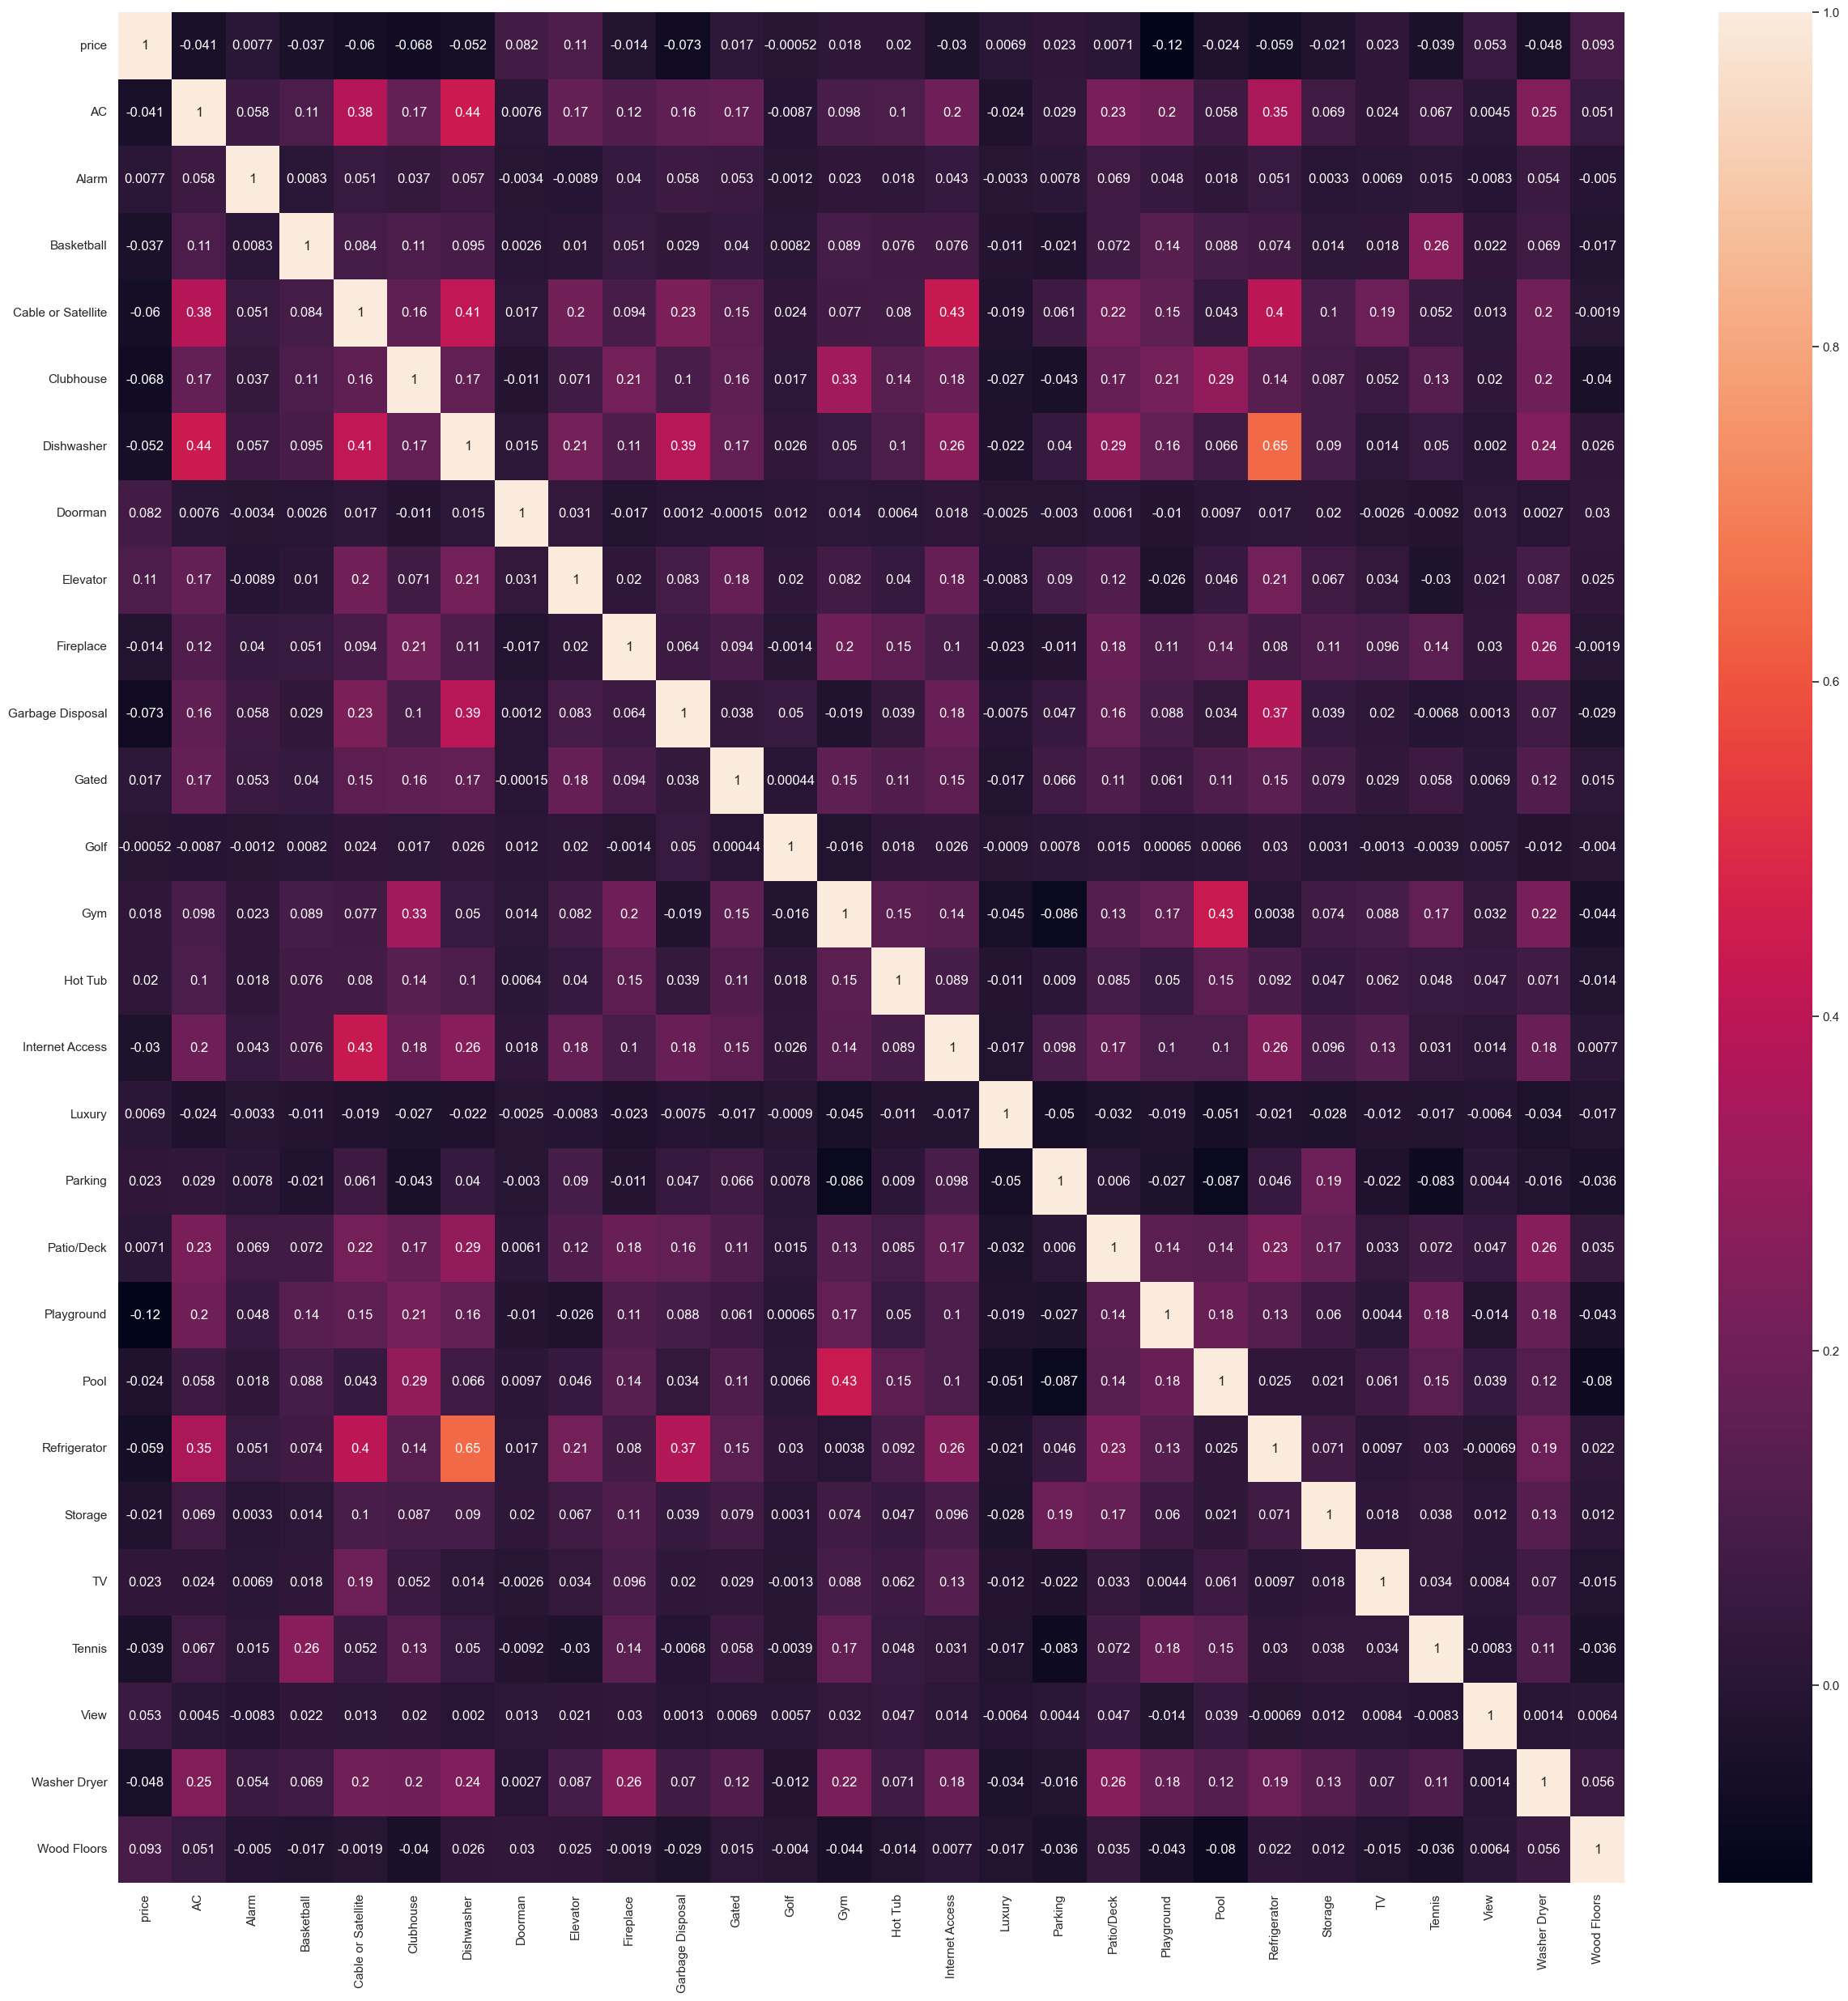

In [8]:
#do heatmap to show correlation between columns price and 'AC', 'Alarm', 'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors'
plt.figure(figsize=(30, 30))
sns.heatmap(data[['price', 'AC', 'Alarm', 'Basketball', 'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator', 'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground', 'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer', 'Wood Floors']].corr(), annot=True)
plt.show()


In [9]:
#create a new column named amenitiy count and make it sum of these Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator','Garbage Disposal', 'Playground', 'Refrigerator', 'View', 'Wood Floors
data['amenity_count'] = data['Cable or Satellite'] + data['Clubhouse'] + data['Dishwasher'] + data['Doorman'] + data['Elevator'] + data['Garbage Disposal'] + data['Playground'] + data['Refrigerator'] + data['View'] + data['Wood Floors']
data = data.drop(columns=['Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator', 'Garbage Disposal', 'Playground', 'Refrigerator', 'View', 'Wood Floors'])
#delete amenity columns except Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator','Garbage Disposal', 'Playground', 'Refrigerator', 'View', 'Wood Floors' 
data = data.drop(columns=['Fireplace', 'AC', 'Alarm', 'Basketball', 'Gated', 'Golf', 'Gym', 'Hot Tub', 'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Pool', 'Storage', 'TV', 'Tennis', 'Washer Dryer'])
data.head()
data 


,id,category,title,body,bathrooms,bedrooms,currency,fee,has_photo,price,price_display,square_feet,cityname,state,latitude,longitude,source,time,amenity_count
21,5668632369,housing/rent/apartment,One BR 7011 W PARMER LN,"This unit is located at 7011 W PARMER LN, Aust...",1.0,1.0,USD,No,Thumbnail,1060.0,"$1,060",650,Austin,TX,30.3054,-97.7497,RentLingo,1577359827,1
22,5668632002,housing/rent/apartment,One BR 2800 SUNRISE RD,"This unit is located at 2800 SUNRISE RD, Round...",1.0,1.0,USD,No,Thumbnail,1003.0,"$1,003",797,Round Rock,TX,30.5118,-97.6873,RentLingo,1577359796,0
23,5668631854,housing/rent/apartment,One BR 12330 METRIC BLVD.,"This unit is located at 12330 METRIC BLVD., Au...",1.0,1.0,USD,No,Thumbnail,837.0,$837,444,Austin,TX,30.3054,-97.7497,RentLingo,1577359784,1
24,5668631790,housing/rent/apartment,One BR 8021 FM 620 NORTH,"This unit is located at 8021 FM 620 NORTH, Aus...",1.0,1.0,USD,No,Thumbnail,1020.0,"$1,020",692,Austin,TX,30.3054,-97.7497,RentLingo,1577359778,1
25,5668631784,housing/rent/apartment,One BR 11500 JOLLYVILLE RD.,"This unit is located at 11500 JOLLYVILLE RD., ...",1.0,1.0,USD,No,Thumbnail,985.0,$985,693,Austin,TX,30.3054,-97.7497,RentLingo,1577359777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...",1.0,1.0,USD,No,Yes,780.0,$780,605,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770,2
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,2.0,2.0,USD,No,Yes,813.0,$813,921,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750,5
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...",1.0,1.0,USD,No,Yes,1325.0,"$1,325",650,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729,2
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...",1.0,1.0,USD,No,Yes,931.0,$931,701,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670,0


In [10]:
#remove outliners from price using iqr
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]
data.head()
data.info()
data.describe()
data
#show mean,median,mode,min,max,avg, std of price like mean : 455454 , median : 454545, mode : 454545, min : 454545, max : 454545, avg : 454545, std : 454545
mean = data['price'].mean()
median = data['price'].median()
mode = data['price'].mode()
min = data['price'].min()
max = data['price'].max()
avg = data['price'].mean()
std = data['price'].std()
print(f'mean : {mean} , median : {median}, mode : {mode}, min : {min}, max : {max}, avg : {avg}, std : {std}')



<class 'pandas.core.frame.DataFrame'>
Index: 79257 entries, 21 to 99491
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             79257 non-null  int64  
 1   category       79257 non-null  object 
 2   title          79257 non-null  object 
 3   body           79257 non-null  object 
 4   bathrooms      79257 non-null  float64
 5   bedrooms       79257 non-null  float64
 6   currency       79257 non-null  object 
 7   fee            79257 non-null  object 
 8   has_photo      79257 non-null  object 
 9   price          79257 non-null  float64
 10  price_display  79257 non-null  object 
 11  square_feet    79257 non-null  int64  
 12  cityname       79257 non-null  object 
 13  state          79257 non-null  object 
 14  latitude       79257 non-null  float64
 15  longitude      79257 non-null  float64
 16  source         79257 non-null  object 
 17  time           79257 non-null  int64  
 18  amenity_co

<Axes: xlabel='price', ylabel='Count'>

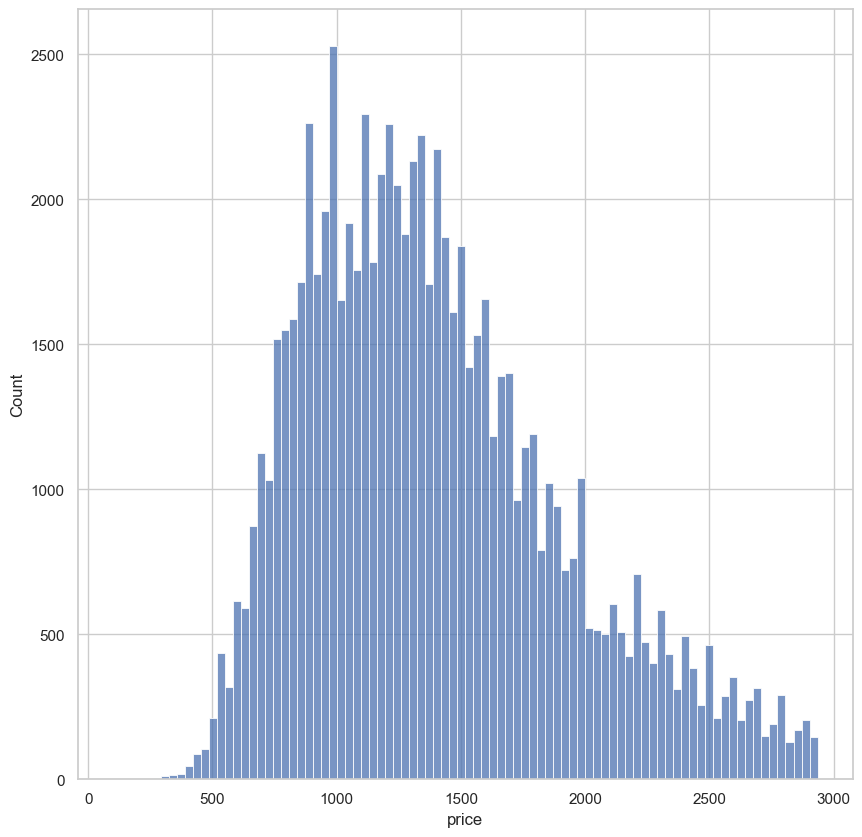

In [11]:
plt.figure(figsize=(10, 10))
sns.histplot(data['price'])


In [12]:
#convert fee column so no is 0 and yes is 1 and nan is 0
data['fee'] = data['fee'].map({'Yes': 1, 'No': 0})
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 79257 entries, 21 to 99491
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             79257 non-null  int64  
 1   category       79257 non-null  object 
 2   title          79257 non-null  object 
 3   body           79257 non-null  object 
 4   bathrooms      79257 non-null  float64
 5   bedrooms       79257 non-null  float64
 6   currency       79257 non-null  object 
 7   fee            79257 non-null  int64  
 8   has_photo      79257 non-null  object 
 9   price          79257 non-null  float64
 10  price_display  79257 non-null  object 
 11  square_feet    79257 non-null  int64  
 12  cityname       79257 non-null  object 
 13  state          79257 non-null  object 
 14  latitude       79257 non-null  float64
 15  longitude      79257 non-null  float64
 16  source         79257 non-null  object 
 17  time           79257 non-null  int64  
 18  amenity_co

C:\Users\barca\AppData\Local\Temp\ipykernel_11732\2360612400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fee'] = data['fee'].map({'Yes': 1, 'No': 0})


,id,bathrooms,bedrooms,fee,price,square_feet,latitude,longitude,time,amenity_count
count,7.925700e+04,79257.000000,79257.000000,79257.000000,79257.000000,79257.000000,79257.000000,79257.000000,7.925700e+04,79257.000000
mean,5.342472e+09,1.419944,1.692456,0.001804,1394.941961,930.847155,36.877792,-90.994355,1.558732e+09,1.128544
std,1.805617e+08,0.514048,0.701901,0.042438,517.934781,299.930820,4.577436,15.312380,1.085694e+07,1.422852
min,5.121046e+09,1.000000,0.000000,0.000000,100.000000,130.000000,19.573800,-159.369800,1.544174e+09,0.000000
25%,5.197908e+09,1.000000,1.000000,0.000000,999.000000,728.000000,33.688100,-98.670400,1.550829e+09,0.000000
50%,5.198605e+09,1.000000,2.000000,0.000000,1313.000000,898.000000,37.145100,-84.478300,1.550863e+09,1.000000
75%,5.508970e+09,2.000000,2.000000,0.000000,1695.000000,1100.000000,39.888900,-77.569900,1.568765e+09,2.000000
max,5.669439e+09,6.000000,6.000000,1.000000,2935.000000,12000.000000,64.833200,-68.778800,1.577391e+09,8.000000


In [13]:
#show min and max bathrooms, bedrooms, square feet, latitude, longitude
min_bedrooms = data['bedrooms'].min()
max_bedrooms = data['bedrooms'].max()
min_bathrooms = data['bathrooms'].min()
max_bathrooms = data['bathrooms'].max()
min_square_feet = data['square_feet'].min()
max_square_feet = data['square_feet'].max()
min_latitude = data['latitude'].min()
max_latitude = data['latitude'].max()
min_longitude = data['longitude'].min()
max_longitude = data['longitude'].max()
print(f'min_bedrooms : {min_bedrooms} , max_bedrooms : {max_bedrooms}, min_bathrooms : {min_bathrooms}, max_bathrooms : {max_bathrooms}, min_square_feet : {min_square_feet}, max_square_feet : {max_square_feet}, min_latitude : {min_latitude}, max_latitude : {max_latitude}, min_longitude : {min_longitude}, max_longitude : {max_longitude}')
print(f"Number of rows in the dataset: {data.shape[0]}")

min_bedrooms : 0.0 , max_bedrooms : 6.0, min_bathrooms : 1.0, max_bathrooms : 6.0, min_square_feet : 130, max_square_feet : 12000, min_latitude : 19.5738, max_latitude : 64.8332, min_longitude : -159.3698, max_longitude : -68.7788
Number of rows in the dataset: 79257


In [14]:
# Assuming you have your full dataset loaded into 'data'
# Define min and max intervals for each column (excluding 'price')
feature_ranges = {
    'amenity_count': (0, 10),
    'bathrooms': (1.0, 6.0),
    'bedrooms': (0.0, 6.0),
    'square_feet': (130, 12000),
    'latitude': (19.5738, 64.8332),
    'longitude': (-159.3698, -68.7788)
}

# Exclude 'price' from normalization
columns_to_normalize = [col for col in data.columns if col != 'price']

# Custom normalization function that handles the entire column
def normalize_column(series, min_val, max_val):
    return (series - min_val) / (max_val - min_val)

# Apply normalization to specified columns
for column in columns_to_normalize:
    if column in feature_ranges:
        min_val, max_val = feature_ranges[column]
        data[column] = normalize_column(data[column], min_val, max_val)

# Check for any NaN values that might have resulted from improper normalization
if data.isnull().values.any():
    print("Warning: There are NaN values in the data after normalization.")

# Print the number of rows in the dataset
print(f"Number of rows in the dataset: {data.shape[0]}")

C:\Users\barca\AppData\Local\Temp\ipykernel_11732\106276604.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = normalize_column(data[column], min_val, max_val)
C:\Users\barca\AppData\Local\Temp\ipykernel_11732\106276604.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = normalize_column(data[column], min_val, max_val)
C:\Users\barca\AppData\Local\Temp\ipykernel_11732\106276604.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Number of rows in the dataset: 79257


In [15]:
# Columns to normalize (excluding 'price')
columns_to_normalize = [
    'amenity_count',
    'bathrooms',
    'bedrooms',
    'square_feet',
    'latitude',
    'longitude'
]



# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Verify the transformation
print(data[columns_to_normalize].describe())

       amenity_count     bathrooms      bedrooms   square_feet      latitude  \
count   79257.000000  79257.000000  79257.000000  79257.000000  79257.000000   
mean        0.141068      0.083989      0.282076      0.067468      0.382329   
std         0.177857      0.102810      0.116983      0.025268      0.101138   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.166667      0.050379      0.311853   
50%         0.125000      0.000000      0.333333      0.064701      0.388235   
75%         0.250000      0.200000      0.333333      0.081719      0.448859   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

          longitude  
count  79257.000000  
mean       0.754771  
std        0.169028  
min        0.000000  
25%        0.670038  
50%        0.826699  
75%        0.902958  
max        1.000000  


C:\Users\barca\AppData\Local\Temp\ipykernel_11732\1620553187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
